# Project Review 3
# Linear Regression, Prediction of Counts of Releases Based off Counts of Revisions
## Gabriel Wilmoth

# Imports and Methods

In [70]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize
import datetime as dt
import glob
import statistics as stat
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from scipy.optimize import curve_fit
from scipy.special import factorial
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = [16,9]

In [3]:
def hex_str(str):
    return bytes.fromhex((str).replace('\\x','')).decode('utf-8')

def date_str(str):
    return pd.to_datetime(str, format='%Y-%m-%dT%H:%M:%S.000Z')

In [49]:
def cleanByYear(df):
    df = df[(df['date'] >= '2017-01-07') & (df['date'] < '2018-09-23')]
    
    return df

# Reading in Releases

In [2]:
release_header = ['id', 'target', 'date', 'date_offset', 'name', 'comment', 'author']
release_path = 'C:\\Users\\Faugh\\Desktop\\DataScienceData\\popular-3k-python\\release.csv'

In [4]:
release_df = pd.read_csv(release_path, names=release_header, converters={'date':date_str,'comment':hex_str})

In [5]:
release_df = release_df[['id','date','name','comment','author']]

In [6]:
release_df.head()

,id,date,name,comment,author
0,\xae671a0067dbeabbc3cb546705edc1f81f71a193,2015-02-03 21:58:44,\x72656c656173652d323031352d30322d3034,"Release for February 4th, 2015\n",91949
1,\x33e2c27d1ec224a54ed7ca4a6e09c352e92a227d,2013-07-05 04:58:14,\x76302e32392e31,tag version 0.29.1\n,140982
2,\x1f9bcd823807f41afaab6b74b34473531ca7eb30,2013-03-29 13:02:20,\x76332e302e30,What's new in Tornado 3.0\n===================...,207066
3,\x3206fb28a040494bac6973310e7f21f031989da6,2010-12-09 04:14:19,\x6275696c642d343639,Windows build SickBeard-win32-alpha-build469\n,875380
4,\x652fc27cf9fe9262d2c941d6385043efa41016da,2011-11-08 01:22:48,\x312e312e36,Fabric 1.1.6\n,63770


# Reading in Revisions

In [7]:
rev_df = pd.read_csv('C:\\Users\\Faugh\\Desktop\\DataScienceData\\popular-3k-python\\revision.csv', header=None)
rev_df.columns = ['id', 'date', 'date_offset', 'committer_date', 'committer_date_offset', 'type', 'directory', 'message', 'author', 'committer']
rev_df = rev_df[['id', 'date']]

rev_df['id'] = rev_df['id'].apply(lambda x: x[2:])
rev_df['date'] = rev_df['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.000Z'))

rev_df.head()

,id,date
0,01714ff5fd94a846f7dc3456a52e6f2dcd36ca0b,2015-04-02 01:11:50
1,01d76a45b817be788eab3e27a93e41c74a6d8957,2010-08-14 17:15:31
2,03ac0bf5d03af97bc7dc7c5aa67d8ee346f8cd1c,2013-09-27 17:02:55
3,05c9110ba2615d42af41a77138bc62dd18278320,2011-10-25 20:11:52
4,06de8d8e88d5b6311ea3feae369c85d157c9dfe3,2017-10-31 20:29:21


# Revisions v.s Releases Graphical Representation

### Revisions Graphical Representation

In [24]:
revPerWeekShort = rev_df[(rev_df['date'] >= '2005-07-07') & (rev_df['date'] < '2018-10-01')]
relShort = release_df[(release_df['date'] >= '2005-07-07') & (release_df['date'] < '2018-10-01')]

In [25]:
revPerDayShortCount = pd.DataFrame()
revPerDayShortCount['count'] = revPerWeekShort['date'].value_counts().resample('d').apply('count')
revPerDayShortCount.head()

,count
2005-07-07,73
2005-07-08,70
2005-07-09,22
2005-07-10,39
2005-07-11,42


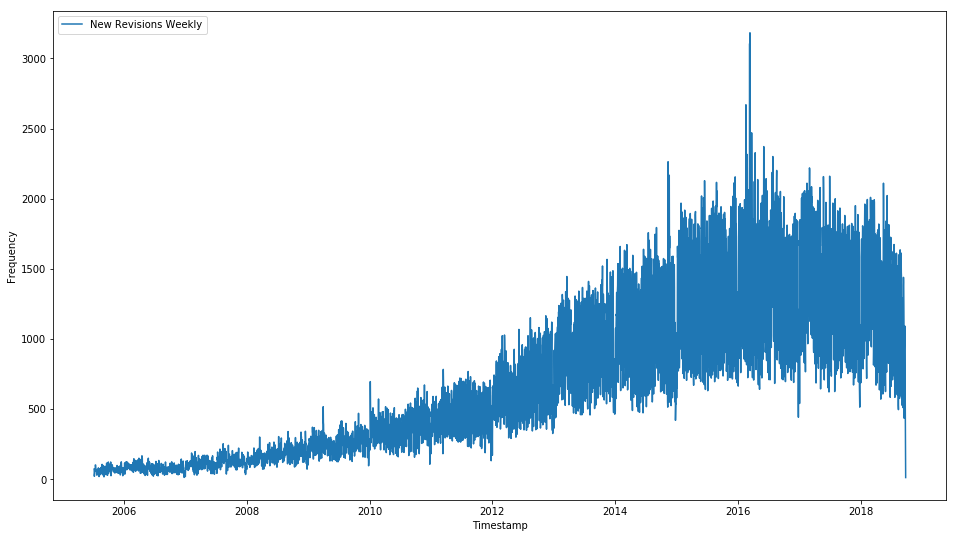

In [26]:
plt.plot(revPerDayShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [27]:
revPerWeekShortCount = pd.DataFrame()
revPerWeekShortCount['count'] = revPerWeekShort['date'].value_counts().resample('w').apply('count')
revPerWeekShortCount.head()

,count
2005-07-10,204
2005-07-17,529
2005-07-24,415
2005-07-31,325
2005-08-07,367


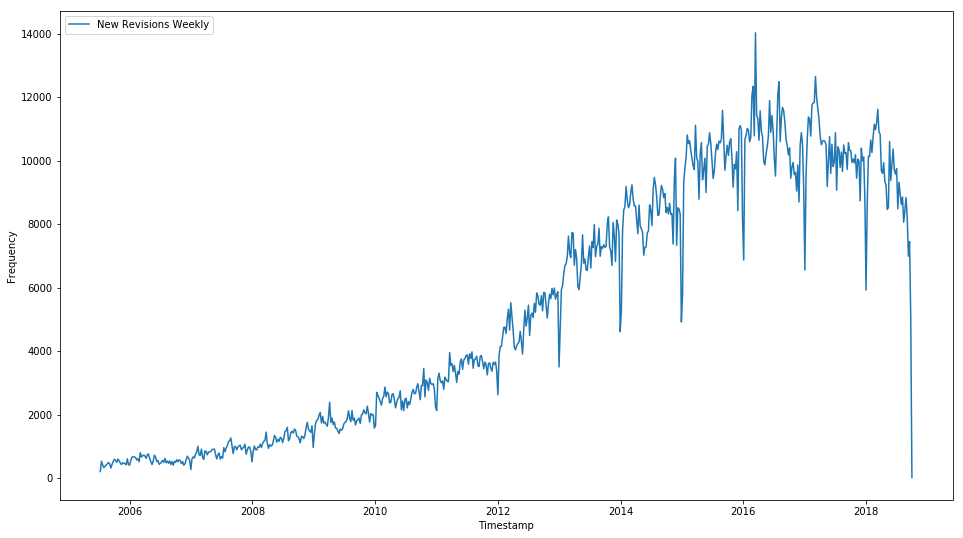

In [28]:
plt.plot(revPerWeekShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [29]:
revPerMonthShortCount = pd.DataFrame()
revPerMonthShortCount['count'] = revPerWeekShort['date'].value_counts().resample('m').apply('count')
revPerMonthShortCount.head()

,count
2005-07-31,1473
2005-08-31,1885
2005-09-30,2029
2005-10-31,2337
2005-11-30,1992


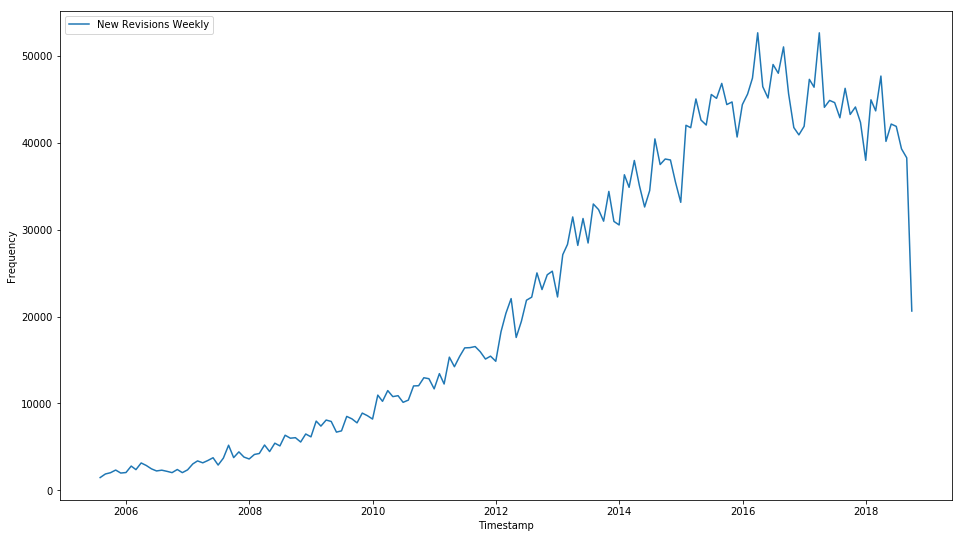

In [30]:
plt.plot(revPerMonthShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [31]:
revPerYearShortCount = pd.DataFrame()
revPerYearShortCount['count'] = revPerWeekShort['date'].value_counts().resample('y').apply('count')
revPerYearShortCount.head()

,count
2005-12-31,11768
2006-12-31,29261
2007-12-31,44246
2008-12-31,65212
2009-12-31,95124


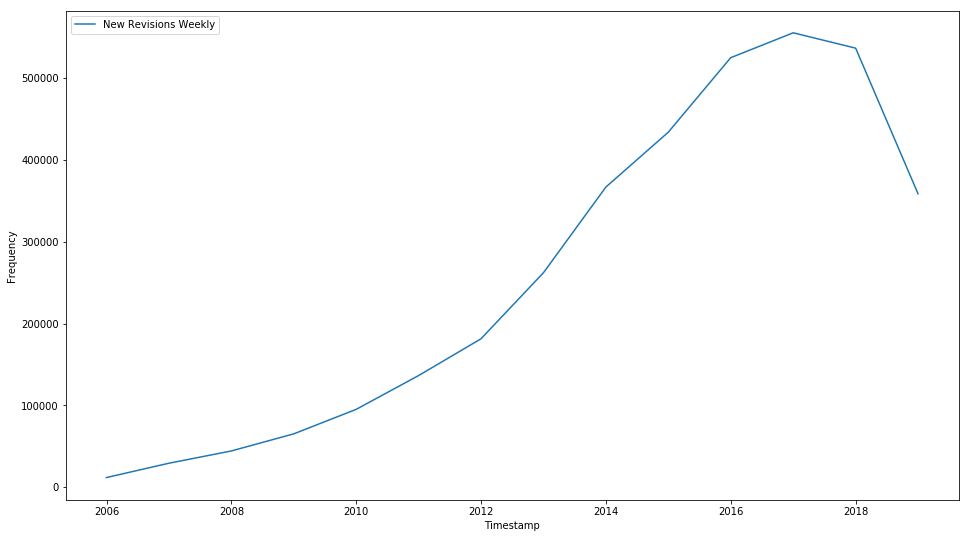

In [32]:
plt.plot(revPerYearShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

### Releases Graphical Representation

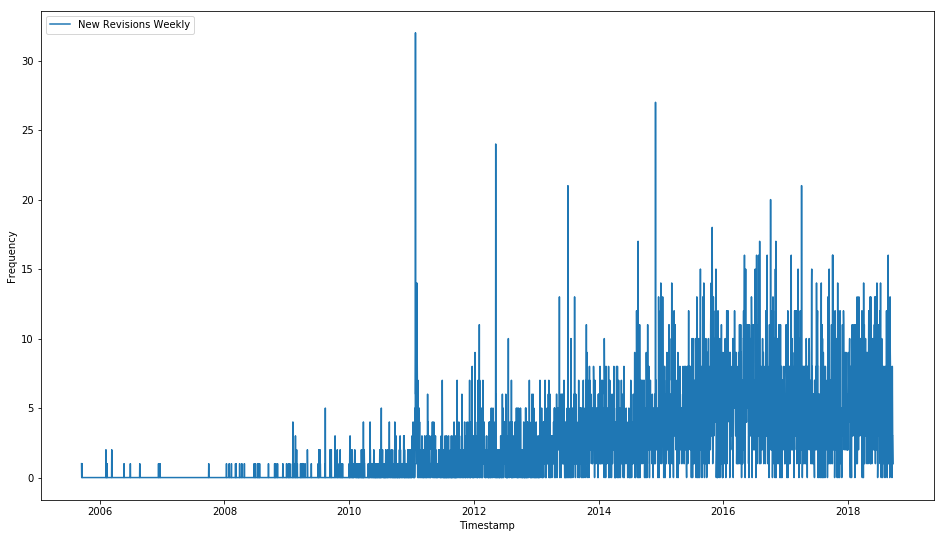

In [33]:
relPerDayShort = pd.DataFrame()
relPerDayShort['count'] = relShort['date'].value_counts().resample('d').apply('count')
relPerDayShort.head()
plt.plot(relPerDayShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

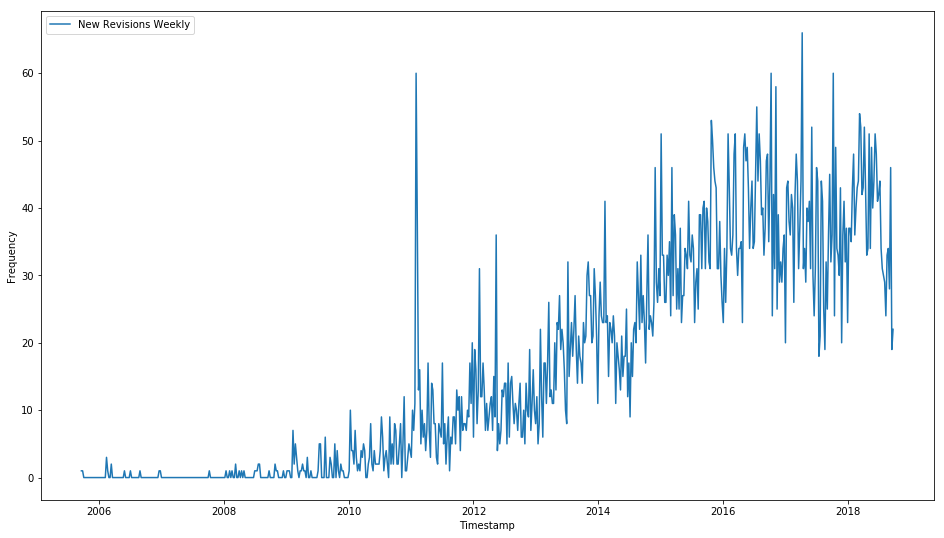

In [34]:
relPerWeekShort = pd.DataFrame()
relPerWeekShort['count'] = relShort['date'].value_counts().resample('w').apply('count')
relPerWeekShort.head()
plt.plot(relPerWeekShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

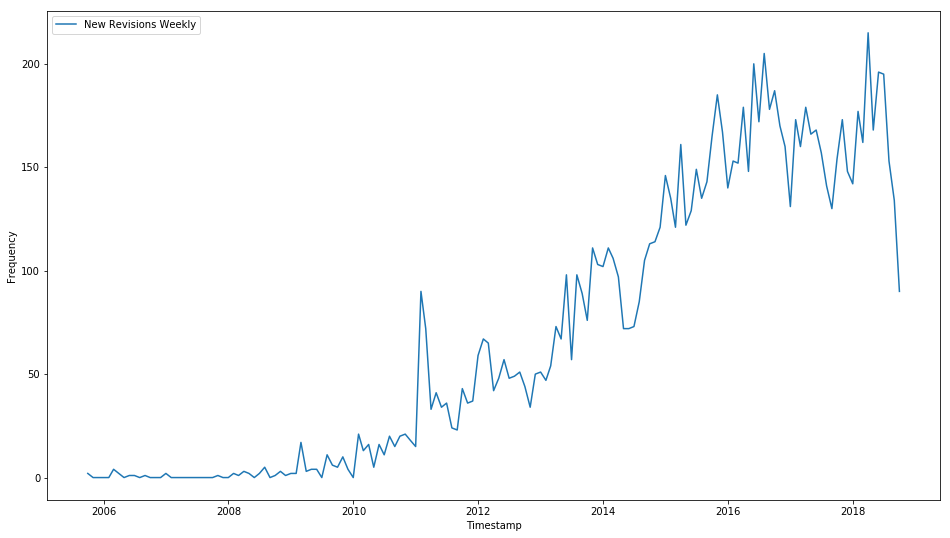

In [35]:
relPerMonthShort = pd.DataFrame()
relPerMonthShort['count'] = relShort['date'].value_counts().resample('m').apply('count')
relPerMonthShort.head()
plt.plot(relPerMonthShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

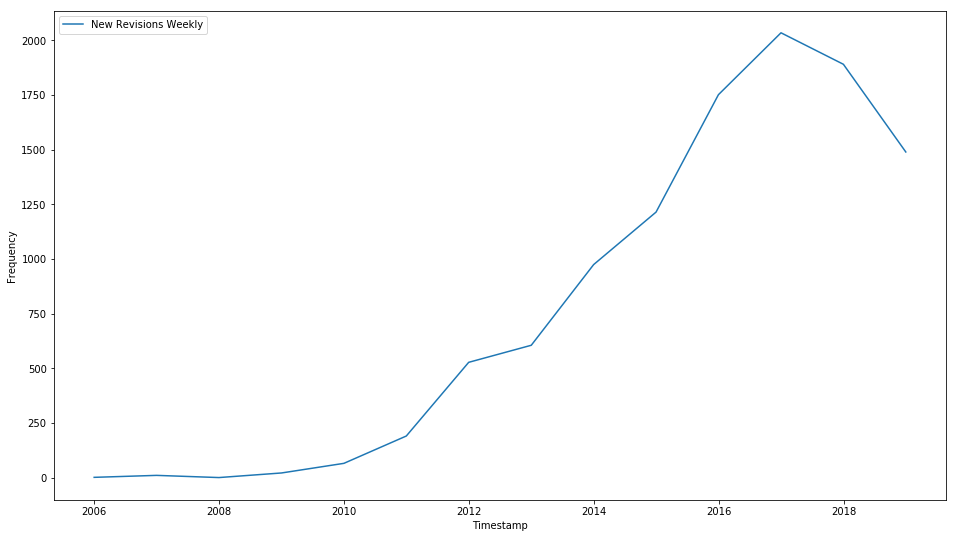

In [36]:
relPerYearShort = pd.DataFrame()
relPerYearShort['count'] = relShort['date'].value_counts().resample('y').apply('count')
relPerYearShort.head()
plt.plot(relPerYearShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

### Revisions and Releases Graphical Representation 

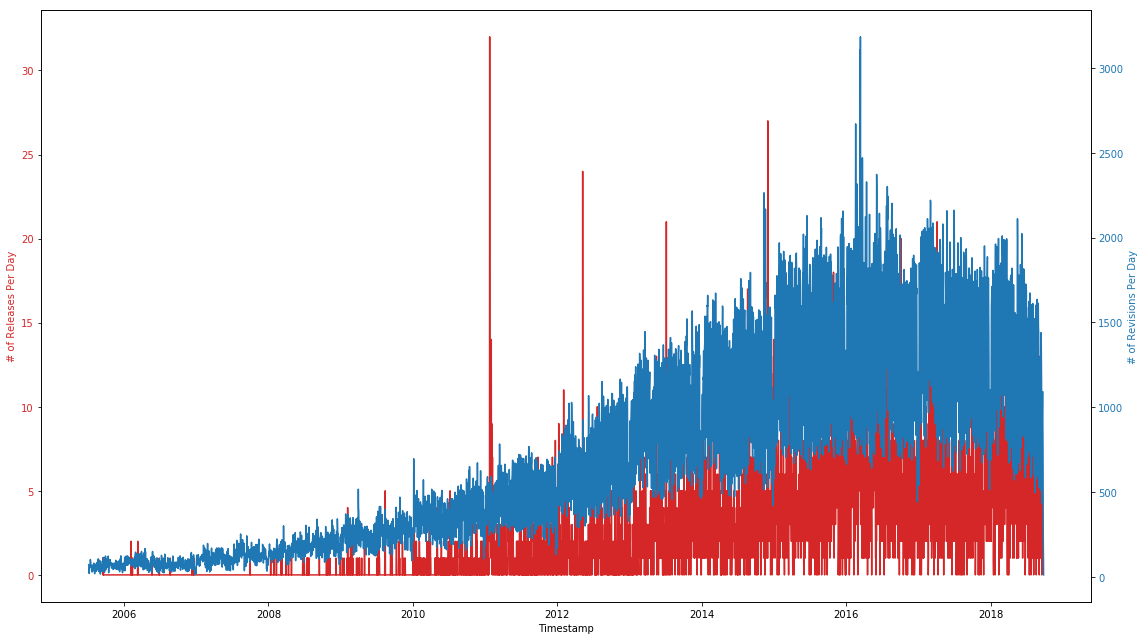

In [37]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('# of Releases Per Day', color=color)
ax1.plot(relPerDayShort, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Revisions Per Day', color=color)  # we already handled the x-label with ax1
ax2.plot(revPerDayShortCount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

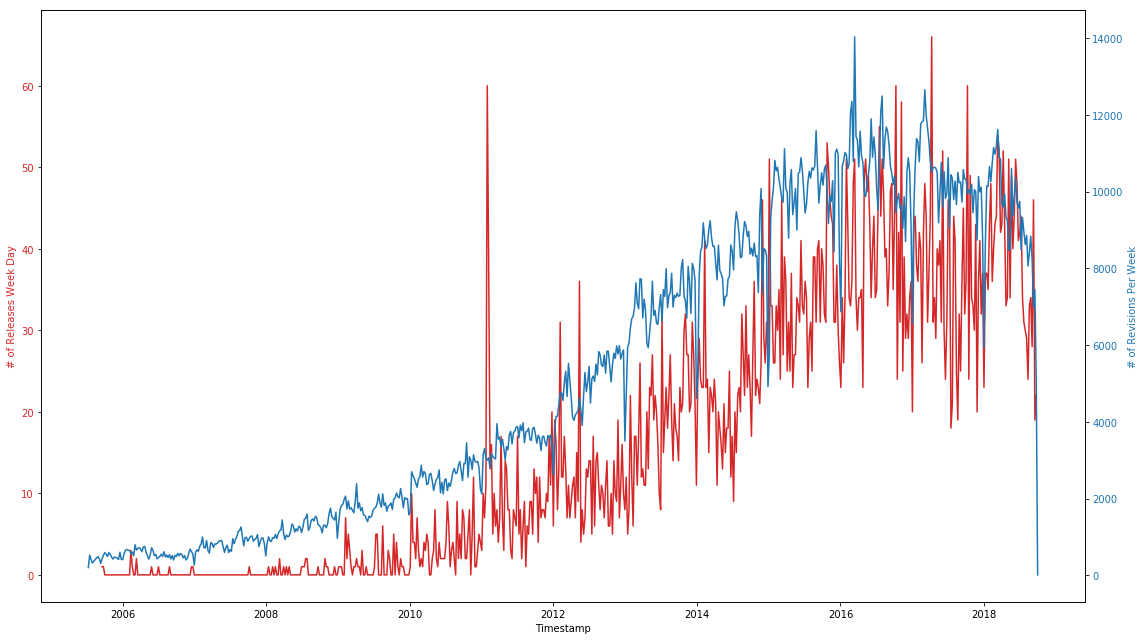

In [38]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('# of Releases Week Day', color=color)
ax1.plot(relPerWeekShort, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Revisions Per Week', color=color)  # we already handled the x-label with ax1
ax2.plot(revPerWeekShortCount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

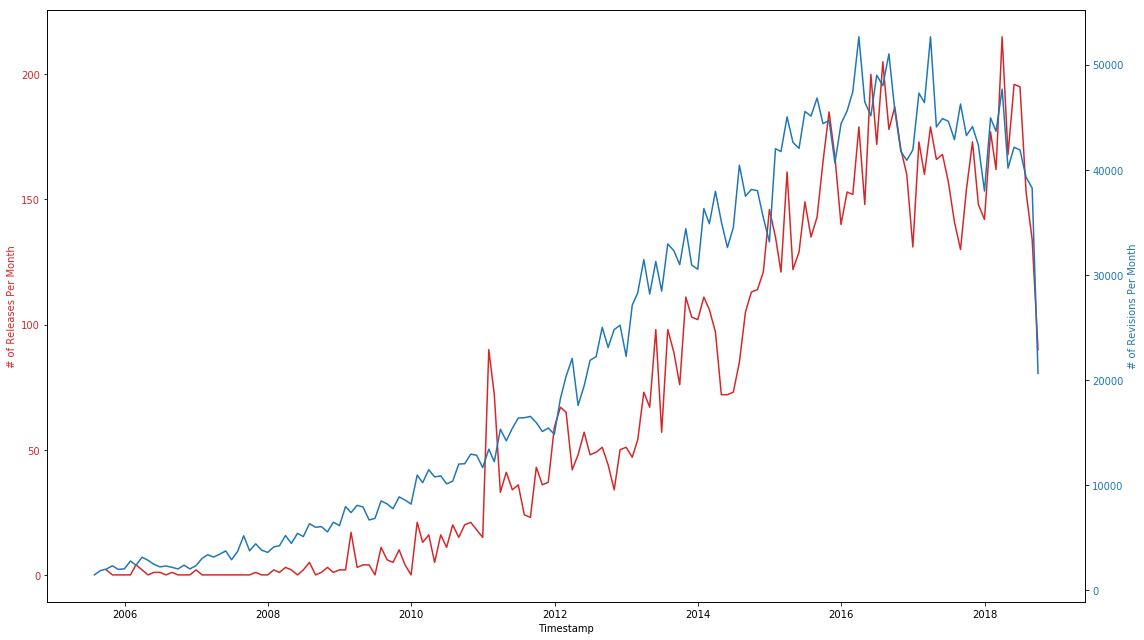

In [39]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('# of Releases Per Month', color=color)
ax1.plot(relPerMonthShort, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Revisions Per Month', color=color)  # we already handled the x-label with ax1
ax2.plot(revPerMonthShortCount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

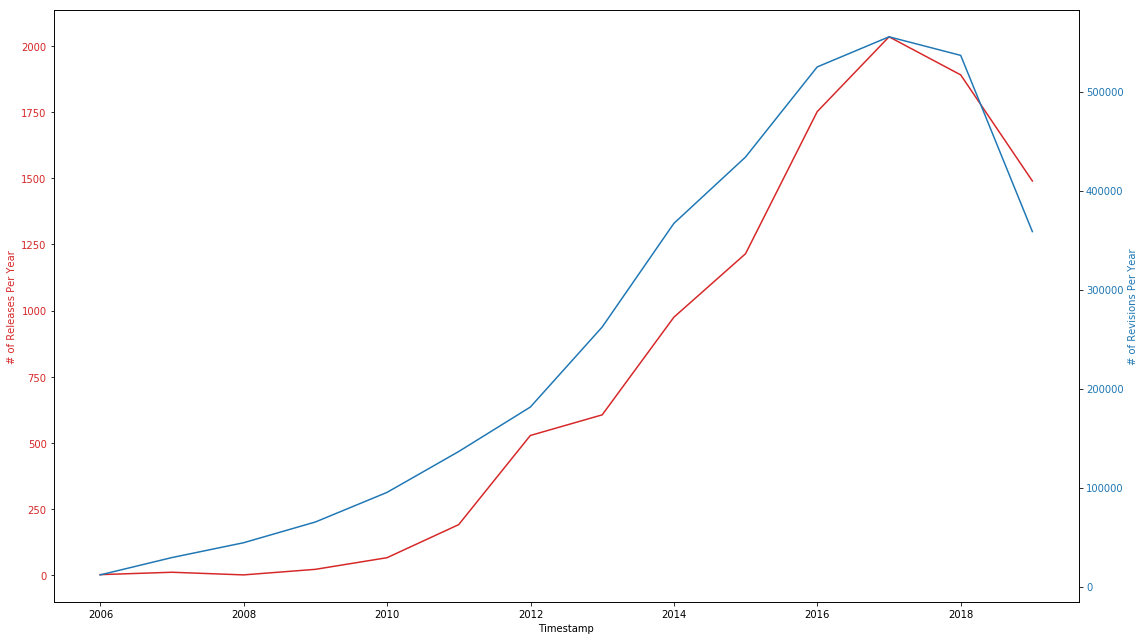

In [40]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('# of Releases Per Year', color=color)
ax1.plot(relPerYearShort, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Revisions Per Year', color=color)  # we already handled the x-label with ax1
ax2.plot(revPerYearShortCount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Take Aways From Graphical Representations Above
 - In looking at the weekly combined graph we can see that releases closely follows the amount of revisions.
     - For example when we see an increase in revisions then we also see and increase in releases about a week or so later.
     - From industry experience this could be attributed to the fact that applications may be nearing their push to production timeline and testing is probably occuring thus resulting in an increase in the amount of revisions. After a project has passed testing then you can normally expect a release within a week or two.
 - All of the graphs seem to show the same relationship.
     - However, lets explore that further...

# Basic Statistics

### Revisions Stats

In [47]:
revPerWeekShortCount_mean = revPerWeekShortCount['count'].mean()
revPerWeekShortCount_med = revPerWeekShortCount['count'].median()
print('Mean:' , revPerWeekShortCount_mean )
print('Median:' , revPerWeekShortCount_med )
revPerWeekShortCount_variance = stat.variance(revPerWeekShortCount['count'], revPerWeekShortCount_mean)
print('Variance:' ,revPerWeekShortCount_variance)
revPerWeekShortCount_stdev = stat.stdev(revPerWeekShortCount['count'])
print('Standard Deviation:' ,revPerWeekShortCount_stdev)

Mean: 5212.984081041968
Median: 4141.0
Variance: 15163573.563514335
Standard Deviation: 3894.0433438155687


In [50]:
rev_df
TrimmedRevisions = cleanByYear(rev_df)
TrimmedRevisions_by_week = pd.DataFrame()
TrimmedRevisions_by_week['count'] = TrimmedRevisions['date'].value_counts().resample('w').apply('count')

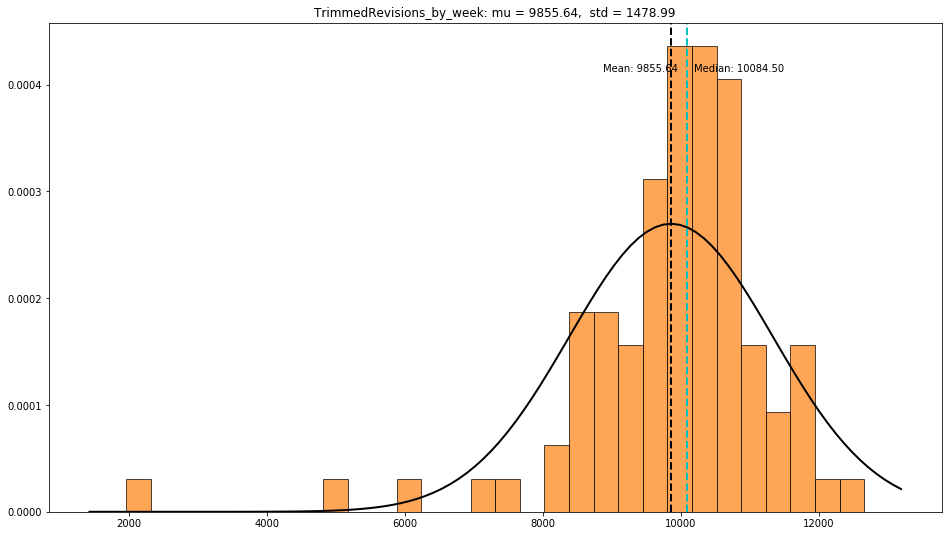

In [51]:
mu,std = norm.fit(TrimmedRevisions_by_week['count'])

plt.hist(TrimmedRevisions_by_week['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "TrimmedRevisions_by_week: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(TrimmedRevisions_by_week['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedRevisions_by_week['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(TrimmedRevisions_by_week['count'].mean()))

#Calc Median and Display
plt.axvline(TrimmedRevisions_by_week['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedRevisions_by_week['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(TrimmedRevisions_by_week['count'].median()))

plt.show()

### Removing Outliers from Revisions

In [54]:
Q1 = TrimmedRevisions_by_week.quantile(0.25)
Q3 = TrimmedRevisions_by_week.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

count    1283.75
dtype: float64


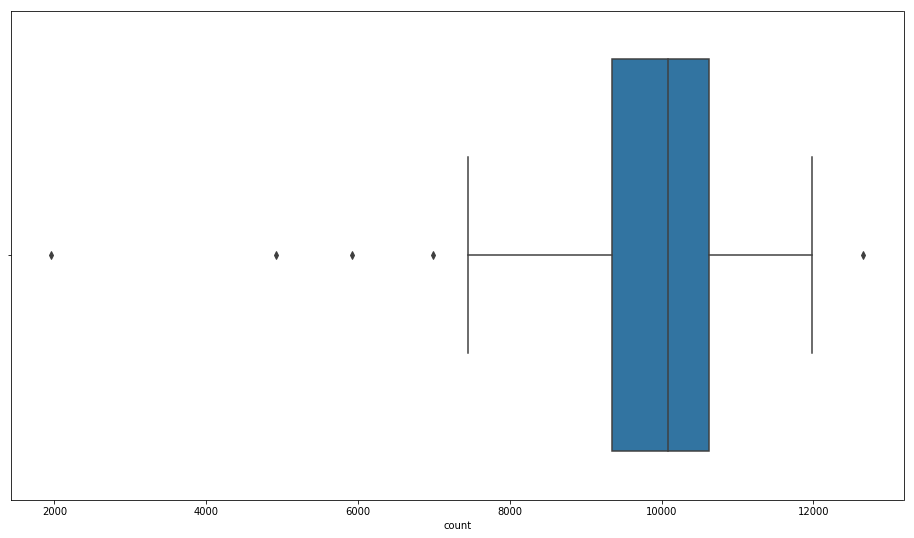

In [55]:
sns.boxplot(x=TrimmedRevisions_by_week['count'])

In [56]:
TrimmedRevisions_by_week_out = TrimmedRevisions_by_week[~((TrimmedRevisions_by_week < (Q1 - 1.5 * IQR)) |(TrimmedRevisions_by_week > (Q3 + 1.5 * IQR))).any(axis=1)]
TrimmedRevisions_by_week_out.shape

(85, 1)

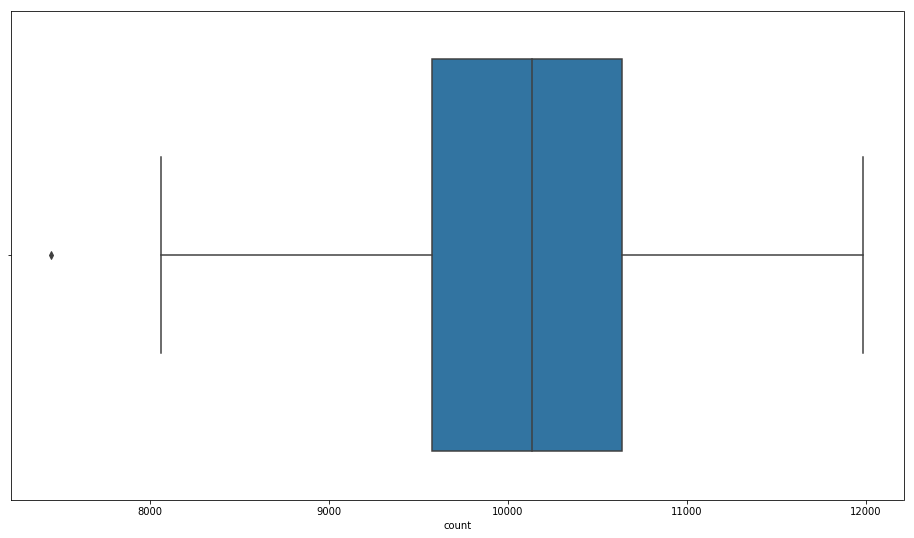

In [57]:
sns.boxplot(x=TrimmedRevisions_by_week_out['count'])

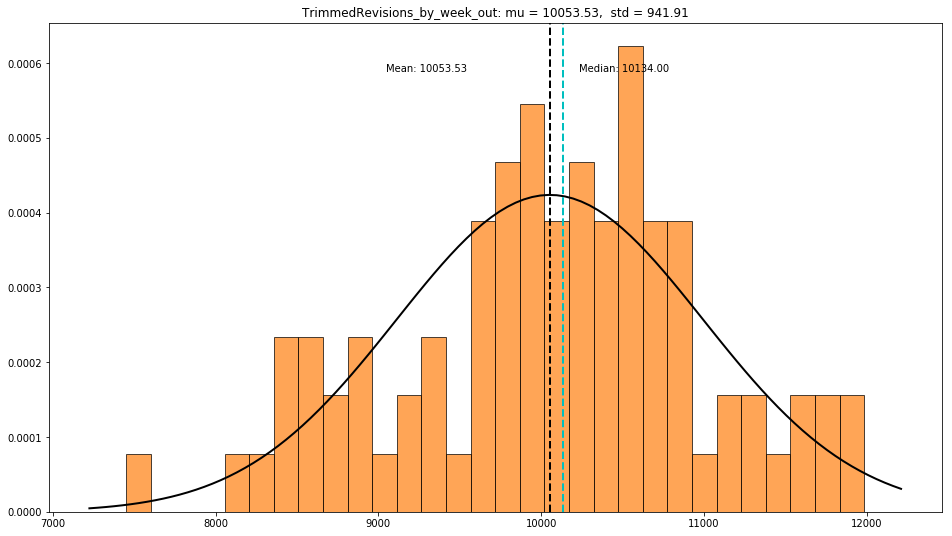

In [58]:
mu,std = norm.fit(TrimmedRevisions_by_week_out['count'])

plt.hist(TrimmedRevisions_by_week_out['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "TrimmedRevisions_by_week_out: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(TrimmedRevisions_by_week_out['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedRevisions_by_week_out['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(TrimmedRevisions_by_week_out['count'].mean()))

#Calc Median and Display
plt.axvline(TrimmedRevisions_by_week_out['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedRevisions_by_week_out['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(TrimmedRevisions_by_week_out['count'].median()))

plt.show()

### Releases Stats

In [48]:
relPerWeekShort_mean = relPerWeekShort['count'].mean()
relPerWeekShort_med = relPerWeekShort['count'].median()
print('Mean:' , relPerWeekShort_mean )
print('Median:' , relPerWeekShort_med )
relPerWeekShort_variance = stat.variance(relPerWeekShort['count'], relPerWeekShort_mean)
print('Variance:' ,relPerWeekShort_variance)
relPerWeekShort_stdev = stat.stdev(relPerWeekShort['count'])
print('Standard Deviation:' ,relPerWeekShort_stdev)

Mean: 15.860294117647058
Median: 10.0
Variance: 266.04672745386813
Standard Deviation: 16.31093888940389


In [52]:
TrimmedReleases = cleanByYear(release_df)
TrimmedReleases_by_week = pd.DataFrame()
TrimmedReleases_by_week['count'] = TrimmedReleases['date'].value_counts().resample('w').apply('count')

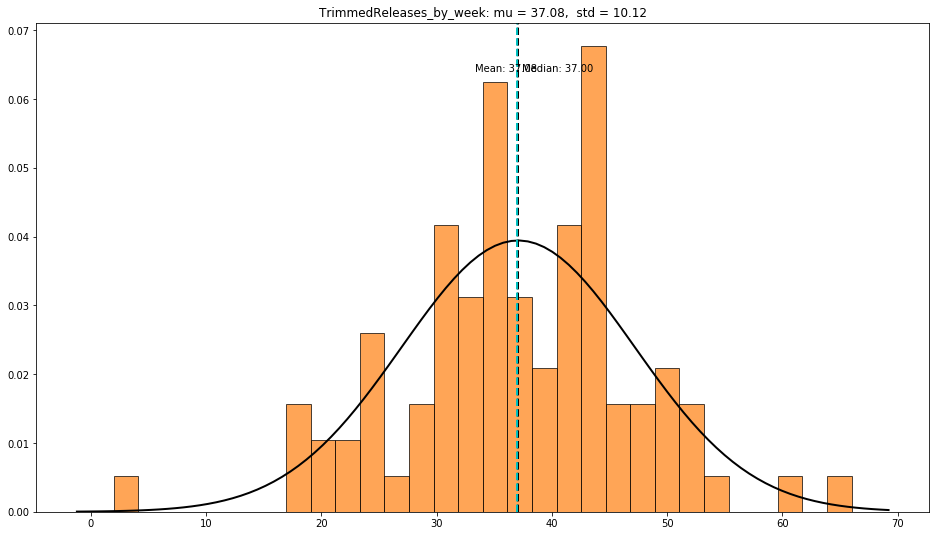

In [53]:
mu,std = norm.fit(TrimmedReleases_by_week['count'])

plt.hist(TrimmedReleases_by_week['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "TrimmedReleases_by_week: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(TrimmedReleases_by_week['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedReleases_by_week['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(TrimmedReleases_by_week['count'].mean()))

#Calc Median and Display
plt.axvline(TrimmedReleases_by_week['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedReleases_by_week['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(TrimmedReleases_by_week['count'].median()))

plt.show()

### Removing Outliers from Releases

In [59]:
Q1 = TrimmedReleases_by_week.quantile(0.25)
Q3 = TrimmedReleases_by_week.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

count    13.0
dtype: float64


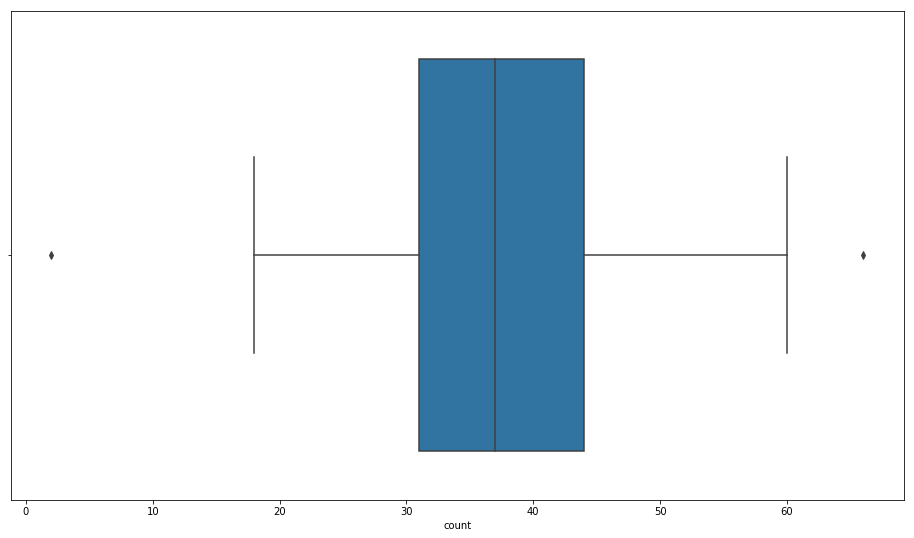

In [60]:
sns.boxplot(x=TrimmedReleases_by_week['count'])

In [61]:
TrimmedReleases_by_week_out = TrimmedReleases_by_week[~((TrimmedReleases_by_week < (Q1 - 1.5 * IQR)) |(TrimmedReleases_by_week > (Q3 + 1.5 * IQR))).any(axis=1)]
TrimmedReleases_by_week_out.shape

(88, 1)

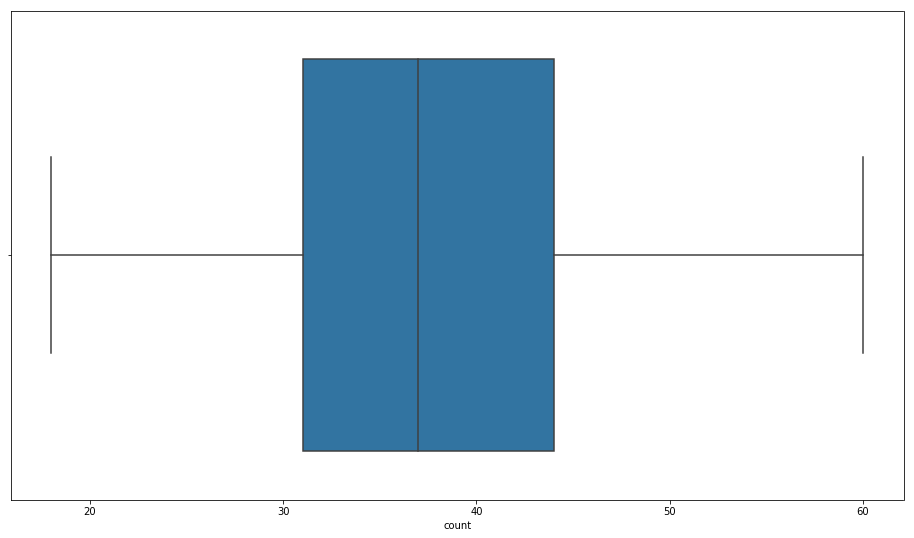

In [62]:
sns.boxplot(x=TrimmedReleases_by_week_out['count'])

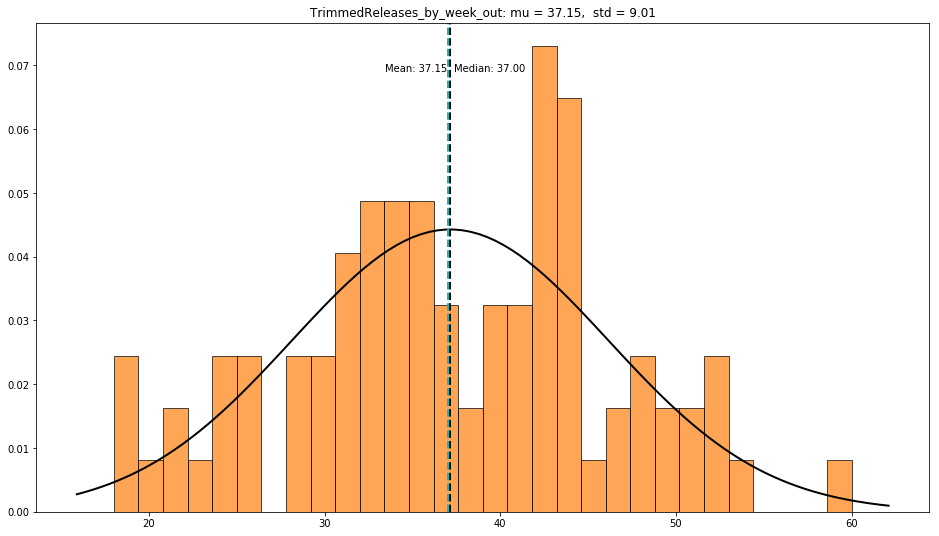

In [63]:
mu,std = norm.fit(TrimmedReleases_by_week_out['count'])

plt.hist(TrimmedReleases_by_week_out['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "TrimmedReleases_by_week_out: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(TrimmedReleases_by_week_out['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedReleases_by_week_out['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(TrimmedReleases_by_week_out['count'].mean()))

#Calc Median and Display
plt.axvline(TrimmedReleases_by_week_out['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedReleases_by_week_out['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(TrimmedReleases_by_week_out['count'].median()))

plt.show()

# Linear Regression
 - Looking at the amount of Revisions per week, can we accurately predict the amount of Releases in the following weeks to come?
     - In answering this above question one would gain insight into future spikes in new software Releases and/or be able to predict the date of future software releases.

In [66]:
#LR Imports
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### We are only working with 90 rows of data, which is not a lot...

In [67]:
TrimmedRevisions_by_week.shape

(90, 1)

In [68]:
TrimmedReleases_by_week.shape

(90, 1)

### Fitting a line

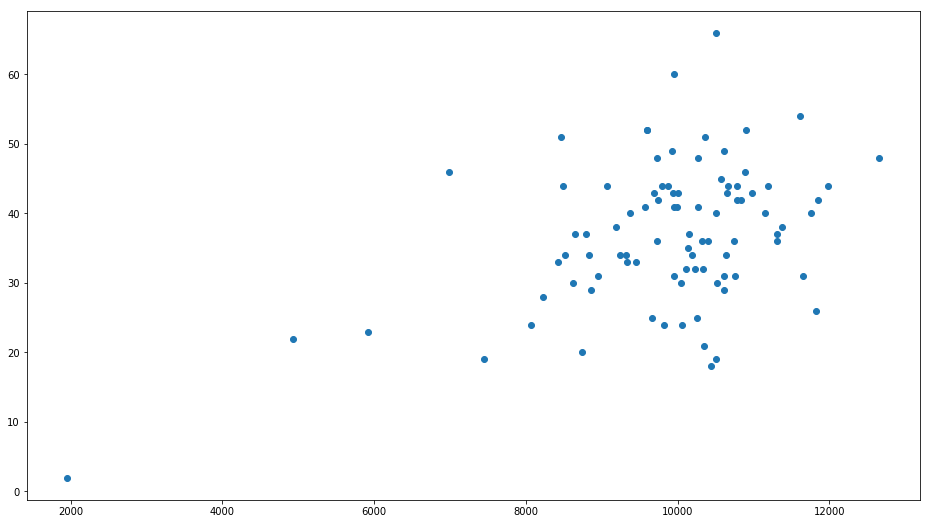

In [71]:
X = TrimmedRevisions_by_week
y = TrimmedReleases_by_week

plt.plot(X.squeeze(), y, 'o')

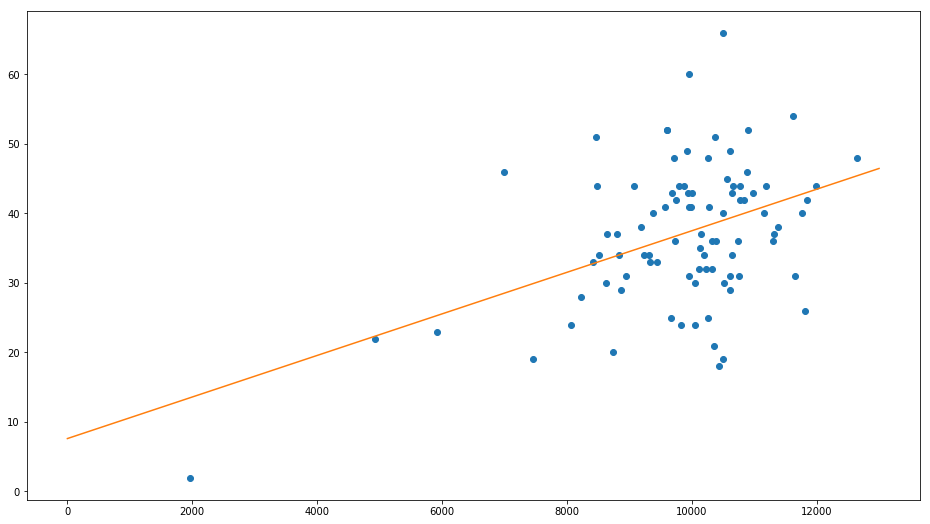

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 13000, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

### Fitting a Random Forest

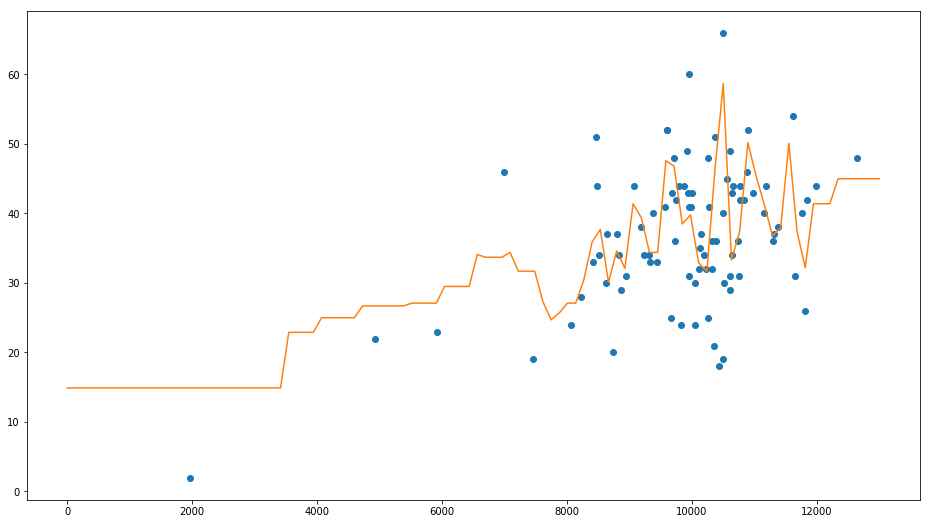

In [73]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 13000, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

In [74]:
TrimmedRevisions_by_week.reset_index(level=0, inplace=True)
TrimmedReleases_by_week.reset_index(level=0, inplace=True)

In [76]:
combinedDF = pd.DataFrame()
combinedDF['RevCount'] = TrimmedRevisions_by_week['count']
combinedDF['Date'] = TrimmedRevisions_by_week['index']
combinedDF['RelCount'] = TrimmedReleases_by_week['count']
combinedDF.head()

,RevCount,Date,RelCount
0,1959,2017-01-08,2
1,10668,2017-01-15,44
2,11381,2017-01-22,38
3,11305,2017-01-29,36
4,10778,2017-02-05,42


In [77]:
combinedDF.shape

(90, 3)

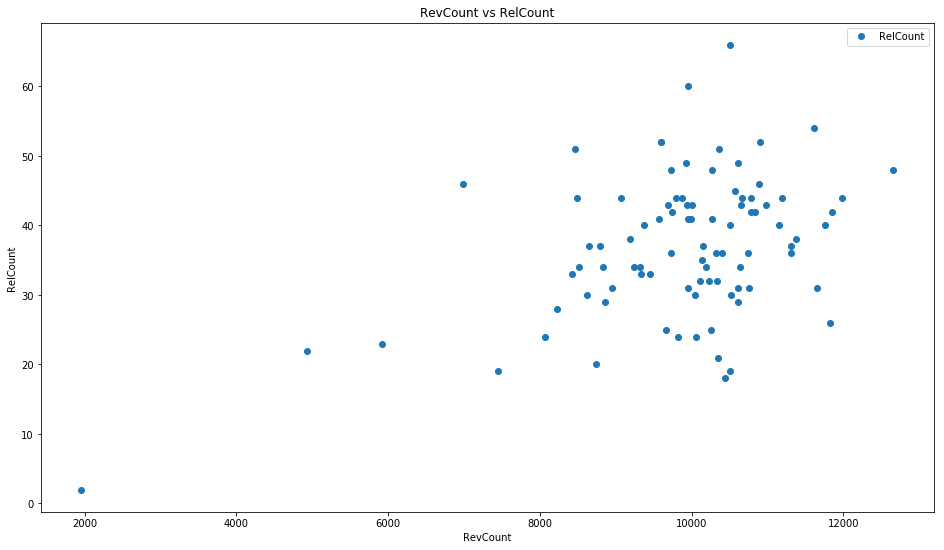

In [78]:
combinedDF.plot(x='RevCount', y='RelCount', style='o')  
plt.title('RevCount vs RelCount')  
plt.xlabel('RevCount')  
plt.ylabel('RelCount')  
plt.show()

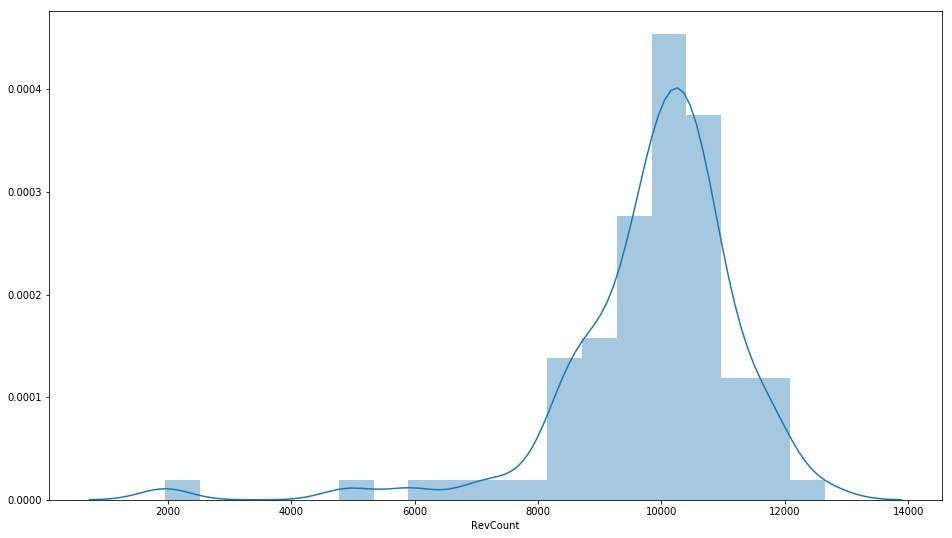

In [79]:
plt.tight_layout()
seabornInstance.distplot(combinedDF['RevCount'])

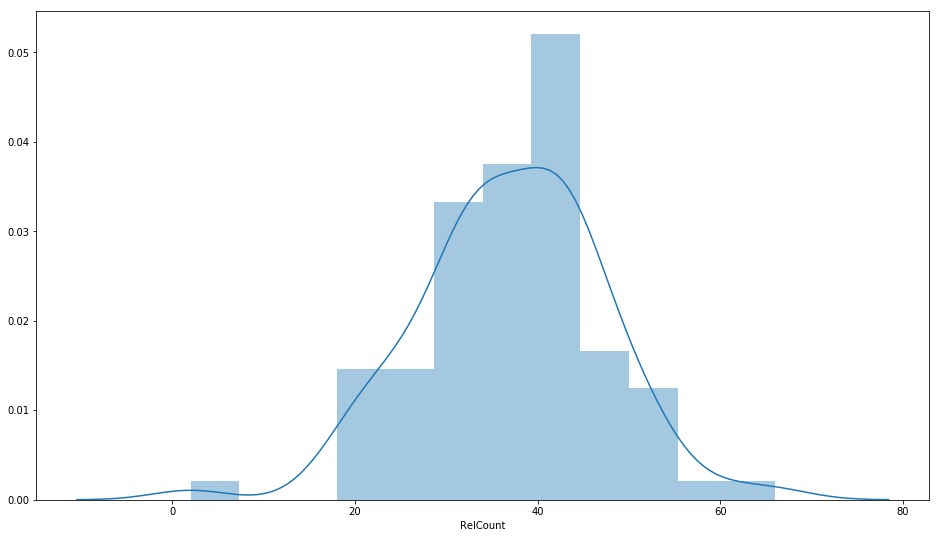

In [80]:
plt.tight_layout()
seabornInstance.distplot(combinedDF['RelCount'])

### Setting X $\rightarrow$ Y

In [81]:
X = combinedDF['RevCount'].values.reshape(-1,1)
y = combinedDF['RelCount'].values.reshape(-1,1)

### Setting Test/Train Split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training The Model

In [83]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
print('Intercept:',regressor.intercept_)
print('Slope:',regressor.coef_)

Intercept: [6.7192197]
Slope: [[0.00300239]]


In [85]:
y_pred = regressor.predict(X_test)

### Result Sample

In [86]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,38,40.889430
1,66,38.256334
2,37,37.187482
3,49,36.532961
4,43,36.565987
5,41,37.562781
6,43,36.740126
7,33,35.088811
8,44,32.194506
9,22,21.508997


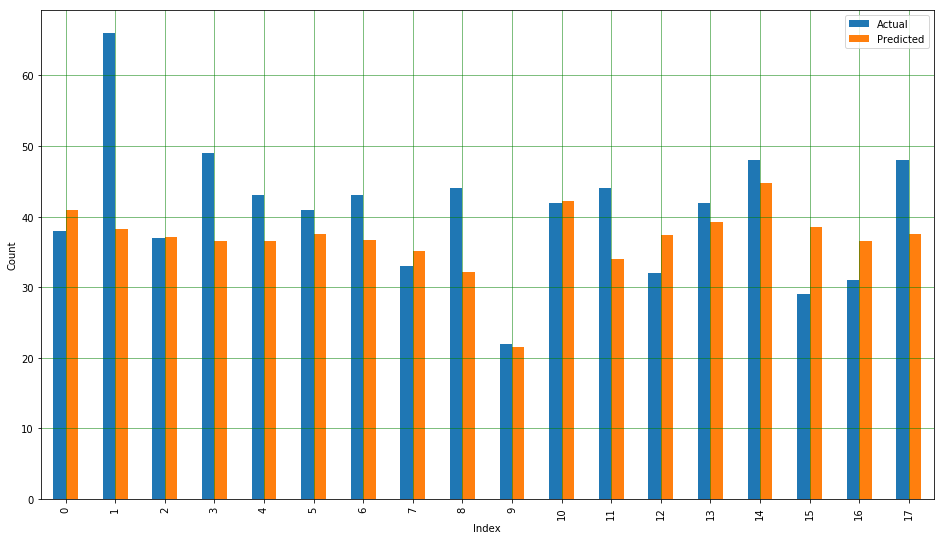

In [89]:
df1 = df
df1.plot(kind='bar',figsize=(16,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

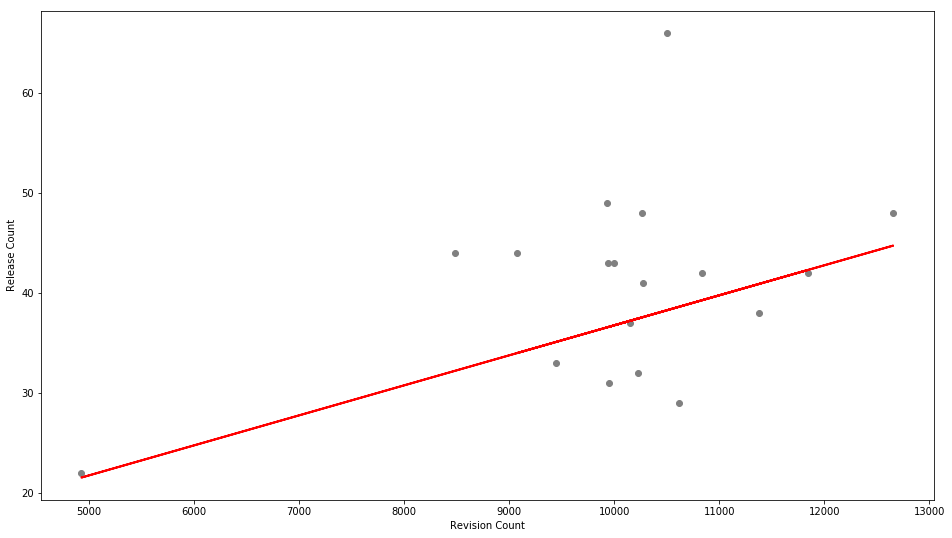

In [90]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Revision Count')
plt.ylabel('Release Count')
plt.show()

In [91]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.735699090965719
Mean Squared Error: 86.19081294936963
Root Mean Squared Error: 9.283900739956758


# Results
- Above we have mentioned the given outcomes of the train data.
    - Now, this doesn't look promising at first glance. However, when we take into account the example predicted v.s actual data in the bar graph above we see that some predictions work well. 
    - To fully determine the effectiveness of this model we would need to dramatically increase our training data. However, I don't have the computational power to run this test with the full dataset we have available. I was merely taking the approach of showing that this type of prediction is possible.
- Interpreting the above Error Measurements:
     - Looking at the Mean Squared Error of $86.19081294936963$ we can say that the difference between our estimated count and the actual count is on average 86. 
     - Again, this is not great, but more training data would definitely be required.